# Prática Guiada: Demonstração de `GridSearchCV`

Vamos usar o conjunto de dados iris... que já conhecemos bem.

Veremos como usar `GridSearchCV` para otimizar o hiperparâmetro `k` do algoritmo de vizinhos mais próximos.

[aqui](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf) há um link para o paper de Ronald Fisher, que usou este conjunto de dados em 1936.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = load_iris()
X = df.data
y = df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=98)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## 1. Escrevendo os parâmetros à mão

É claro que, dependendo do modelo, os hiperparâmetros podem ter um efeito considerável na qualidade da previsão. 
Vamos ver como a precisão varia na hora de prever a espécie das flores para diferentes valores de K.

In [6]:
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
k_scores

[0.9631868131868131,
 0.9626373626373625,
 0.9774725274725273,
 0.9774725274725273,
 0.9780219780219781,
 0.9780219780219781,
 0.9780219780219781,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9760739260739261,
 0.9760739260739261,
 0.9760739260739261,
 0.9760739260739261,
 0.9669830169830169,
 0.968931068931069,
 0.9760739260739261,
 0.9683816183816184,
 0.9592907092907093,
 0.9592907092907093,
 0.9669830169830169,
 0.9683816183816184,
 0.9760739260739261,
 0.9606893106893107,
 0.9592907092907093,
 0.9606893106893107,
 0.9515984015984016,
 0.9515984015984016,
 0.9592907092907093,
 0.9515984015984016,
 0.9592907092907093,
 0.9592907092907093,
 0.9592907092907093,
 0.9592907092907093,
 0.9592907092907093,
 0.9592907092907093,
 0.9592907092907093,
 0.9592907092907093,
 0.945004995004995,
 0.959290709290

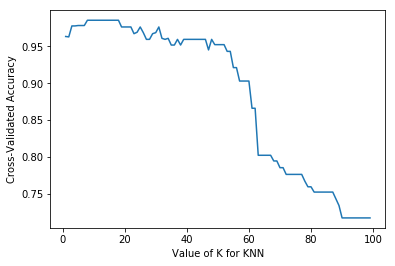

In [8]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

Como sempre, observamos que o desempenho muda para diferentes valores do hiperparâmetro. <br />
Como podemos sistematizar essa pesquisa e adicionar mais hiperparâmetros à exploração? 

## 2. Usando `GridSearch`


In [7]:
from sklearn.model_selection import GridSearchCV

É definida uma lista de parâmetros a serem testados.

In [8]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier()

In [9]:
range(1, 31)

range(1, 31)

In [10]:
param_grid = dict(n_neighbors=range(1, 31))
print(param_grid)

{'n_neighbors': range(1, 31)}


Instanciar o método `GridSearchCV`

In [13]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

Fazer o ajuste

In [14]:
grid.fit(X_train, y_train)

/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

`GridSeachCV` retorna um dict com muitas informações. Do momento da configuração de cada parâmetro até os scores médios (via validação cruzada). Ele também fornece os scores em cada conjunto de treino e teste da Validação Cruzada K-Fold. 

In [11]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [15]:
pd.DataFrame(grid.cv_results_).columns

/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/marcossilv

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [16]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000742,0.000071,0.001779,0.000100,1,{'n_neighbors': 1},0.857143,0.928571,0.923077,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000590,0.000025,0.001694,0.000079,2,{'n_neighbors': 2},0.928571,0.928571,0.846154,0.923077,...,0.981308,0.971963,0.972477,0.972477,0.972477,0.972477,0.972477,0.972477,0.975040,0.004030
2,0.000604,0.000023,0.001740,0.000084,3,{'n_neighbors': 3},1.000000,0.928571,0.923077,0.923077,...,0.981308,0.981308,0.972477,0.972477,0.972477,0.972477,0.972477,0.972477,0.976918,0.006008
3,0.000544,0.000021,0.001889,0.000806,4,{'n_neighbors': 4},1.000000,0.928571,0.923077,0.923077,...,0.981308,0.981308,0.972477,0.972477,0.972477,0.972477,0.972477,0.972477,0.976918,0.006008
4,0.000514,0.000018,0.001594,0.000081,5,{'n_neighbors': 5},0.928571,0.928571,0.923077,1.000000,...,0.990654,0.981308,0.981651,0.981651,0.981651,0.981651,0.972477,0.981651,0.981496,0.004070
5,0.000527,0.000049,0.001558,0.000053,6,{'n_neighbors': 6},0.928571,0.928571,0.923077,1.000000,...,0.990654,0.981308,0.981651,0.981651,0.981651,0.981651,0.972477,0.981651,0.982439,0.004887
6,0.000511,0.000047,0.001796,0.000900,7,{'n_neighbors': 7},0.928571,0.928571,0.923077,1.000000,...,0.981308,0.981308,0.972477,0.981651,0.981651,0.972477,0.972477,0.972477,0.978753,0.005767
7,0.000545,0.000079,0.001663,0.000144,8,{'n_neighbors': 8},1.000000,0.928571,0.923077,1.000000,...,0.990654,0.981308,0.981651,0.981651,0.981651,0.981651,0.981651,0.981651,0.983357,0.003631
8,0.000508,0.000019,0.001606,0.000118,9,{'n_neighbors': 9},1.000000,0.928571,0.923077,1.000000,...,0.990654,0.981308,0.981651,0.981651,0.981651,0.981651,0.981651,0.981651,0.983357,0.003631
9,0.000576,0.000115,0.001750,0.000379,10,{'n_neighbors': 10},1.000000,0.928571,0.923077,1.000000,...,0.990654,0.981308,0.981651,0.981651,0.981651,0.981651,0.981651,0.981651,0.983357,0.003631


Vamos ver o melhor modelo:

In [17]:
grid.best_params_

{'n_neighbors': 8}

In [18]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=8, p=2,
            weights='uniform'), 0.9833333333333333, {'n_neighbors': 8})

### 2.1 Adicionando outros parâmetros para ajustar

Vamos adicionar o parâmetro binário de peso do algoritmo knn que determina se alguns vizinhos terão mais peso do que outros no momento da classificação. O valor de distância indica que o peso é inversamente proporcional à distância

GridSearchCV exige que a grade de parâmetros a serem verificados venha em um dicionário com os nomes dos parâmetros e a lista dos valores possíveis. 

Observe que o GridSearchCV possui todos os métodos que a API sklearn oferece para modelos preditivos: fit, predict, predict_proba, etc.

In [19]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Agora a otimização será feita iterando e alternando `weights` e `k` (número de vizinhos próximos).

In [21]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


**Verificar:** 
    1. Como o processo de busca será realizado? 
    2. Quantas vezes o algoritmo terá que ser iterado?

Ajustar os modelos

In [22]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
pd.DataFrame(grid.cv_results_)

/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/marcossilv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000798,0.000624,0.001559,0.000402,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.857143,0.928571,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000439,0.000119,0.000792,0.000195,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.857143,0.928571,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000371,0.000072,0.001060,0.000249,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.928571,0.928571,0.846154,...,0.981308,0.971963,0.972477,0.972477,0.972477,0.972477,0.972477,0.972477,0.975040,0.004030
3,0.000298,0.000011,0.000575,0.000020,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.857143,0.928571,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000258,0.000016,0.000723,0.000067,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.000000,0.928571,0.923077,...,0.981308,0.981308,0.972477,0.972477,0.972477,0.972477,0.972477,0.972477,0.976918,0.006008
5,0.000232,0.000007,0.000454,0.000020,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.000000,0.928571,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.000268,0.000027,0.000778,0.000053,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",1.000000,0.928571,0.923077,...,0.981308,0.981308,0.972477,0.972477,0.972477,0.972477,0.972477,0.972477,0.976918,0.006008
7,0.000251,0.000008,0.000490,0.000015,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.928571,0.928571,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.000250,0.000009,0.000719,0.000037,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.928571,0.928571,0.923077,...,0.990654,0.981308,0.981651,0.981651,0.981651,0.981651,0.972477,0.981651,0.981496,0.004070
9,0.000238,0.000005,0.000465,0.000006,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.928571,0.928571,0.923077,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Escolher o melhor modelo

In [24]:
print (grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')
0.9833333333333333
{'n_neighbors': 8, 'weights': 'uniform'}


## 3. Usar os melhores modelos para executar as previsões

In [25]:
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.81      0.90        16
           2       0.67      1.00      0.80         6

   micro avg       0.90      0.90      0.90        30
   macro avg       0.89      0.94      0.90        30
weighted avg       0.93      0.90      0.90        30



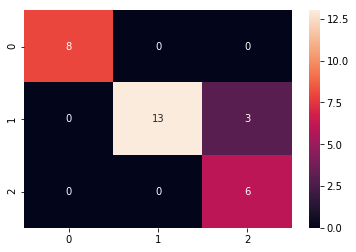

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print (classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

Podemos usar o atalho que `GridSeachCV` possui: usando o método` predict` sobre o objeto `grid`. 

In [27]:
grid.predict(X_test)

array([2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2,
       0, 0, 2, 0, 0, 1, 2, 0])